In [1]:
# checking python version
from platform import python_version
print(python_version())

3.9.7


### Import Packages

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

from statsmodels.stats.weightstats import ztest as ztest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [3]:
# absorbance readings of samples
df = pd.read_csv("../datasets/calibration.csv")
df

,Well,Sample,Dilution,220,222,224,226,228,230,232,...,782,784,786,788,790,792,794,796,798,800
0,A1,S1,1,3.736,3.389,3.636,4.059,4.713,4.672,5.287,...,0.061,0.061,0.062,0.060,0.060,0.060,0.061,0.060,0.060,0.059
1,A3,S1,2,3.669,3.651,3.956,4.445,5.287,5.287,5.287,...,0.054,0.054,0.055,0.053,0.053,0.053,0.055,0.053,0.053,0.052
2,A5,S1,4,3.232,4.083,4.167,3.785,5.164,5.028,5.112,...,0.053,0.054,0.052,0.051,0.051,0.051,0.052,0.050,0.050,0.050
3,A7,S1,8,3.131,3.328,3.814,4.026,4.893,5.287,4.825,...,0.051,0.050,0.050,0.049,0.049,0.050,0.050,0.049,0.051,0.048
4,A9,S1,16,3.235,3.784,4.502,4.987,5.287,5.287,5.287,...,0.053,0.052,0.052,0.051,0.051,0.052,0.052,0.052,0.052,0.050
5,A11,S1,32,3.043,3.826,3.722,3.854,4.973,5.287,5.145,...,0.052,0.051,0.051,0.051,0.050,0.051,0.051,0.051,0.052,0.051
6,B1,S1,64,3.381,3.484,4.089,3.829,4.271,4.722,5.033,...,0.053,0.053,0.053,0.051,0.051,0.051,0.052,0.052,0.051,0.050
7,B3,S1,128,3.772,4.212,3.998,4.006,5.002,5.106,4.814,...,0.052,0.052,0.052,0.051,0.050,0.051,0.052,0.051,0.052,0.050
8,B5,S1,1,2.956,3.329,3.306,3.651,4.246,4.593,5.065,...,0.076,0.075,0.075,0.075,0.074,0.074,0.075,0.074,0.073,0.073
9,B7,S1,2,3.248,3.987,4.444,4.681,4.528,5.070,5.115,...,0.055,0.055,0.054,0.053,0.052,0.053,0.054,0.054,0.053,0.052


In [4]:
# row to column
df_converted = df.melt(id_vars=["Sample", "Dilution", "Well"], 
        var_name="Wavelength", 
        value_name="Absorbance")
df_converted

,Sample,Dilution,Well,Wavelength,Absorbance
0,S1,1,A1,220,3.736
1,S1,2,A3,220,3.669
2,S1,4,A5,220,3.232
3,S1,8,A7,220,3.131
4,S1,16,A9,220,3.235
...,...,...,...,...,...
7852,S1,64,D9,800,0.051
7853,S1,128,D11,800,0.051
7854,Blank,1,E1,800,0.049
7855,Blank,1,E3,800,0.050


### Descriptive Analysis 
- measures of central tendency (mean, median, mode), 
- dispersion (quartiles, range, standard deviation, variance) 
- shape of data (symmetric, skewness, kurtosis)

In [5]:
# checking data types
cat_cols = df_converted.select_dtypes(include = 'object')
num_cols =df_converted.select_dtypes(include = np.number)
print('Numerical variables are : ', num_cols.columns)
print('Categorical Columns are : ', cat_cols.columns)

Numerical variables are :  Index(['Dilution', 'Absorbance'], dtype='object')
Categorical Columns are :  Index(['Sample', 'Well', 'Wavelength'], dtype='object')


In [6]:
# obj to int
df_converted['Wavelength'] = df_converted['Wavelength'].astype(str).astype(int) 

df_converted.describe()

,Dilution,Wavelength,Absorbance
count,7857.000000,7857.000000,7857.000000
mean,28.444444,510.000000,0.683779
std,40.230000,168.018629,1.526654
min,1.000000,220.000000,0.044000
25%,2.000000,364.000000,0.053000
50%,8.000000,510.000000,0.068000
75%,32.000000,656.000000,0.217000
max,128.000000,800.000000,5.287000


In [7]:
df_converted.skew()

Dilution      1.616346
Wavelength    0.000000
Absorbance    2.438509
dtype: float64

#### Interpretation
Skewness values for all variables are between 0 and 2.4. The positive skewness values indicate an asymmetry in the distribution. 

In [8]:
df_converted.kurt()

Dilution      1.329918
Wavelength   -1.200028
Absorbance    4.224558
dtype: float64

#### Interpretation
- kurtosis value > +1 => a distribution is too peak
- kurtosis value < -1 => a distribution is too flat

### Exploratory Data Analysis

In [9]:
# checking % of missing values in columns
for col in df_converted.columns:
    pct_missing = np.mean(df_converted[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Sample - 0%
Dilution - 0%
Well - 0%
Wavelength - 0%
Absorbance - 0%


#### Interpretation

There is no missing data in this dataset.

<AxesSubplot:>

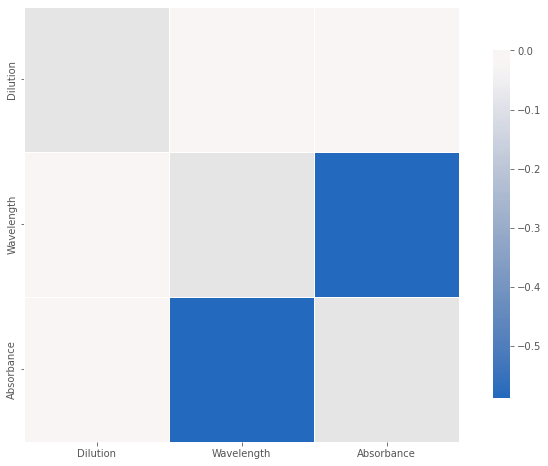

In [10]:
# checking significant correlations 
df_cor = df_converted.corr(method = "pearson") # correlation value with pearson matrix
sns.heatmap(df_cor, mask=np.eye(len(df_cor)), square=True, center=0, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8})

#### Interpretation
Absorbance and Wavelength are negatively correlated. 

In [11]:
var = list(['Absorbance','Wavelength','Dilution'])

# checking the correlation between Absorbance and their independent variables, 'Wavelength','Dilution'
df_converted[var].corr()

,Absorbance,Wavelength,Dilution
Absorbance,1.000000,-5.886907e-01,-1.554486e-02
Wavelength,-0.588691,1.000000e+00,-2.139725e-16
Dilution,-0.015545,-2.139725e-16,1.000000e+00


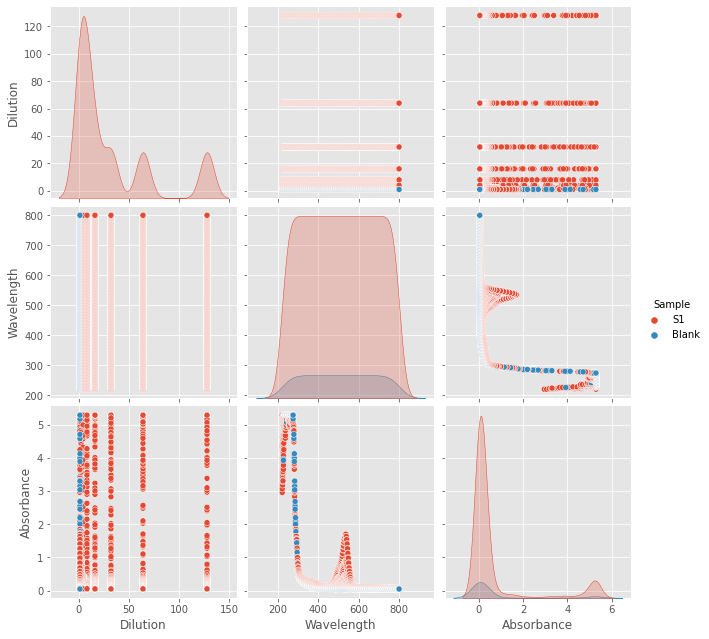

In [12]:
# checking relationship between variables
sns.pairplot(df_converted, hue = "Sample", size = 3)

<AxesSubplot:xlabel='Absorbance'>

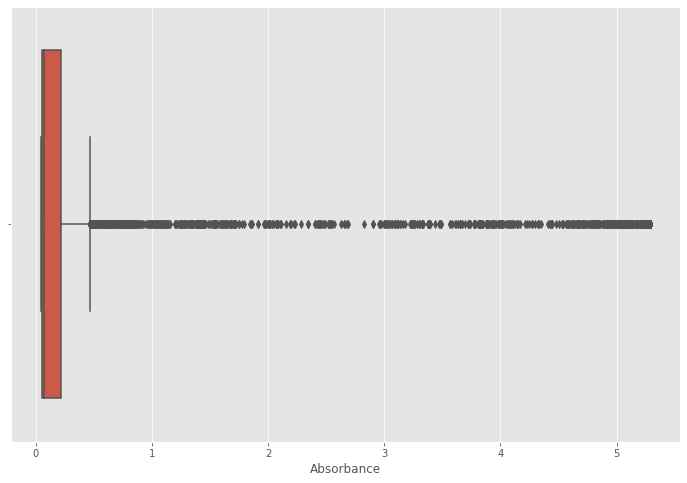

In [13]:
# detecting outliers
sns.boxplot(x = df_converted['Absorbance'])

In [14]:
# detecting IQR, with upper and lower *quartiles*
Q1_df = df_converted.quantile(0.25)
Q3_df = df_converted.quantile(0.75)

IQR_df = Q3_df - Q1_df
print(IQR_df)

Dilution       30.000
Wavelength    292.000
Absorbance      0.164
dtype: float64


In [15]:
# after removing some outliers from dataset
df_clean_outlier_IQR = df_converted[~((df_converted < (Q1_df - 1.5 * IQR_df)) | (df_converted > (Q3_df + 1.5 * IQR_df))).any(axis = 1)]
df_clean_outlier_IQR.shape

(5812, 5)

<AxesSubplot:xlabel='Absorbance'>

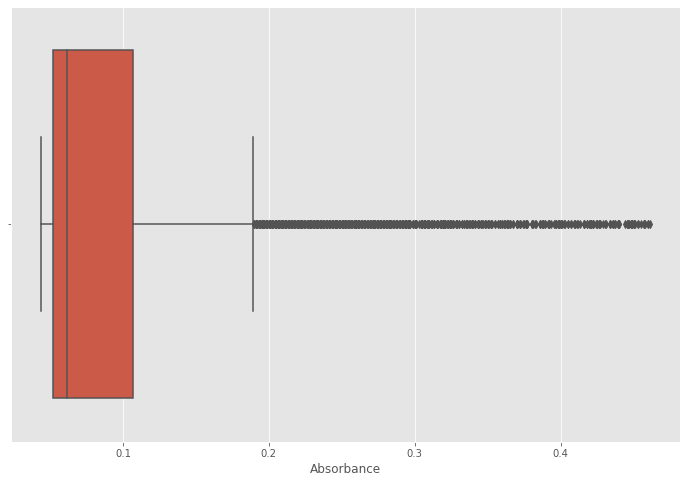

In [16]:
# detecting outliers
sns.boxplot(x = df_clean_outlier_IQR['Absorbance'])

### Diagnostic Analysis

##### Hypothesis Analysis

In [17]:

ztest(df_converted["Absorbance"], df_converted["Wavelength"], value=0)

(-268.68320564159444, 0.0)

##### Regression Analysis

In [19]:
dependent_variable = (['Absorbance'])
independent_variable = (['Wavelength','Dilution'])

# define X and Y
X = df_converted[independent_variable].values 
Y = df_converted[dependent_variable].values 

In [20]:
sample_data = pd.get_dummies(df_converted['Sample'])
data_df = pd.concat([df_converted, sample_data], axis=1)
data_df.drop(['Sample', 'Well'], inplace=True, axis=1)
data_df

,Dilution,Wavelength,Absorbance,Blank,S1
0,1,220,3.736,0,1
1,2,220,3.669,0,1
2,4,220,3.232,0,1
3,8,220,3.131,0,1
4,16,220,3.235,0,1
...,...,...,...,...,...
7852,64,800,0.051,0,1
7853,128,800,0.051,0,1
7854,1,800,0.049,1,0
7855,1,800,0.050,1,0


In [21]:
# splitting the dataset into train and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [22]:
# creating an object of linearRegression class
LR = LinearRegression()
# fit the training data using fit method
LR.fit(x_train,y_train)

LinearRegression()

In [23]:
# prediction using the dataset
y_pred = LR.predict(x_test)
y_pred

array([[ 1.55533574],
       [-0.47674399],
       [ 0.80219186],
       ...,
       [ 1.66103292],
       [ 2.056841  ],
       [ 0.29169813]])

In [24]:
# predicting the accuracy score
score = r2_score(y_test, y_pred)

print('r2 score (Absorbance) is  : ', score)
print('mean_sqrd_error :', mean_squared_error(y_test, y_pred))
print('root_mean_squared error : ', np.sqrt(mean_squared_error(y_test, y_pred)))

r2 score (Absorbance) is  :  0.35752480312919654
mean_sqrd_error : 1.5273885080098062
root_mean_squared error :  1.2358756037764504


In [25]:
# the summary of the regression
reg2 = sm.OLS(df_converted["Absorbance"], sm.add_constant(df_converted[['Wavelength','Dilution']])).fit()
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:             Absorbance   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     2085.
Date:                Sat, 07 Jan 2023   Prob (F-statistic):               0.00
Time:                        03:53:19   Log-Likelihood:                -12799.
No. Observations:                7857   AIC:                         2.560e+04
Df Residuals:                    7854   BIC:                         2.563e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4285      0.046     75.236      0.0

### Visualisation

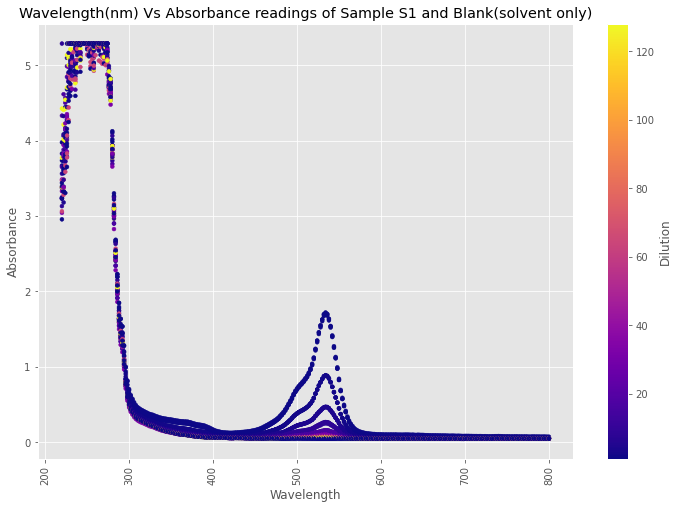

In [26]:
# Scatter Plot
fig, ax = plt.subplots()
df_converted['Wavelength'] = df_converted['Wavelength'].astype(str).astype(int) # obj to int
df_converted.plot(kind = 'scatter', x = 'Wavelength', y = 'Absorbance', s=15, c="Dilution", cmap="plasma", ax=ax)
plt.title("Wavelength(nm) Vs Absorbance readings of Sample S1 and Blank(solvent only)")
plt.xticks(rotation=90)
plt.show()

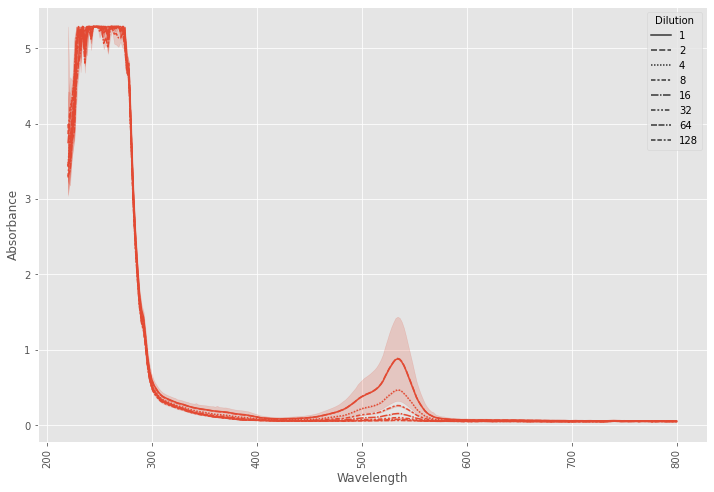

In [27]:
# Line Plot
sns.lineplot(x="Wavelength", y="Absorbance", style="Dilution", data=df_converted)
plt.xticks(rotation=90)
plt.show()

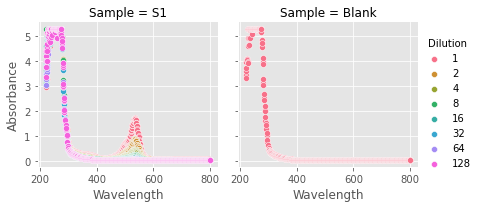

In [28]:
# A facetgrid
graph = sns.FacetGrid(df_converted, col ="Sample",  hue ="Dilution")
# map the above form facetgrid with some attributes
graph.map(plt.scatter, "Wavelength", "Absorbance", edgecolor ="w").add_legend()
# show the object
plt.show()

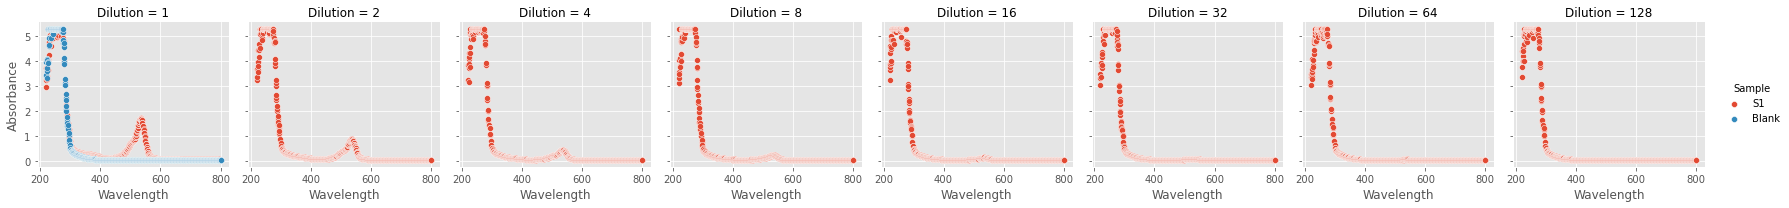

In [29]:
# A facetgrid
graph = sns.FacetGrid(df_converted, col ="Dilution",  hue ="Sample")
# map the above form facetgrid with some attributes
graph.map(plt.scatter, "Wavelength", "Absorbance", edgecolor ="w").add_legend()
# show the object
plt.show()

### Interpretation

Left facetgrid - between 200 nm and 300nm, lower wavelengths, the absorbance values were highest for all dilution levels. After that, it dropped to almost zero level of absorbance and increased again after 500nm. Based on the different dilution level, undiluted(highest concentration) presents the highest absorbance peak of the sample(pigment). Before 600 nm, it went down to zero level again till the end of the graph.

Right face grid -  solvent only(called Blank), absorbance started from the above of three near the lower wavelength, 200 nm and increased gradually till over five. Before reaching 300 nm wavelength, there was the highest absorbance. After That, it jumped down to zero level and continued to the end of the wavelength, 800 nm. 

## Modeling

-  the concentration of the solvent is constant.

In [30]:
# absorbance readings of samples(pigments)
df2 = pd.read_csv("../datasets/sample.csv")
df2

,Well,Sample,Dilution,220,222,224,226,228,230,232,...,782,784,786,788,790,792,794,796,798,800
0,A1,X1,1,1.251,0.334,0.301,0.885,0.292,0.000,0.000,...,0.016,0.016,0.016,0.016,0.016,0.015,0.015,0.016,0.016,0.014
1,A2,X1,1,1.251,0.334,0.301,0.885,0.317,0.000,0.000,...,0.023,0.023,0.023,0.023,0.023,0.021,0.022,0.021,0.022,0.022
2,A3,X1,1,-0.377,-0.408,0.301,0.684,-0.046,0.000,0.000,...,0.018,0.017,0.017,0.018,0.017,0.016,0.017,0.016,0.015,0.015
3,B1,Blank,1,3.977,3.618,4.070,3.960,4.618,5.287,5.287,...,0.051,0.050,0.049,0.050,0.050,0.050,0.049,0.050,0.050,0.049
4,B2,Blank,1,3.393,3.726,4.098,3.924,4.907,4.660,5.287,...,0.052,0.052,0.052,0.050,0.050,0.051,0.051,0.051,0.052,0.050
5,B3,Blank,1,3.439,3.322,4.038,5.287,5.287,4.939,5.287,...,0.049,0.048,0.048,0.047,0.047,0.047,0.048,0.048,0.047,0.047


In [31]:
# row to column
df_converted2 = df2.melt(id_vars=["Sample", "Dilution", "Well"], 
        var_name="Wavelength", 
        value_name="Absorbance")
df_converted2

,Sample,Dilution,Well,Wavelength,Absorbance
0,X1,1,A1,220,1.251
1,X1,1,A2,220,1.251
2,X1,1,A3,220,-0.377
3,Blank,1,B1,220,3.977
4,Blank,1,B2,220,3.393
...,...,...,...,...,...
1741,X1,1,A2,800,0.022
1742,X1,1,A3,800,0.015
1743,Blank,1,B1,800,0.049
1744,Blank,1,B2,800,0.050


In [32]:
# checking % of missing values in columns
for col in df_converted2.columns:
    pct_missing = np.mean(df_converted2[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Sample - 0%
Dilution - 0%
Well - 0%
Wavelength - 0%
Absorbance - 0%


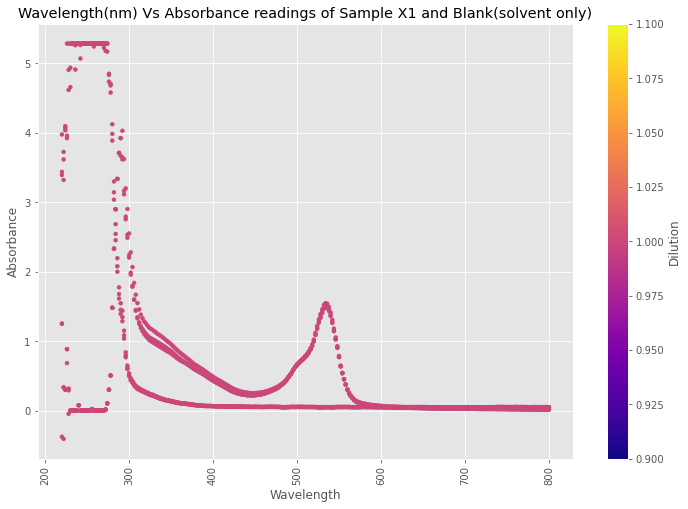

In [33]:
# Scatter Plot
fig, ax = plt.subplots()
df_converted2['Wavelength'] = df_converted2['Wavelength'].astype(str).astype(int) # obj to int
df_converted2.plot(kind = 'scatter', x = 'Wavelength', y = 'Absorbance', s=15, c="Dilution", cmap="plasma", ax=ax)
plt.title("Wavelength(nm) Vs Absorbance readings of Sample X1 and Blank(solvent only)")
plt.xticks(rotation=90)
plt.show()

###  A mathematical model to calculate the pigment concentration of S1(calibration dataset).

C = P / D

C = concentration of pigment \
P = amount of pigment \
D = dilution

where if D = 1, undiluted, the highest concentration of pigment

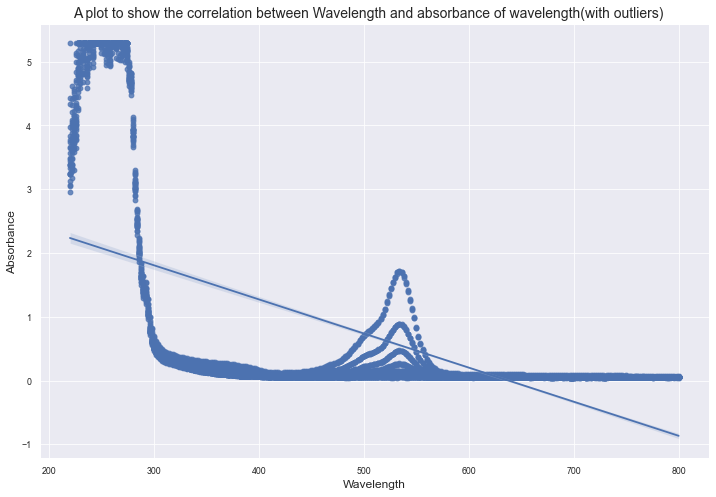

In [34]:
# investigating the correlation between two quantitative variables graphically
# Dilution, Absorbance, Wavelength
# seaborn’s regplot(), with outlier data points
sns.set_theme(color_codes = True)
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":14,"axes.labelsize":12})  
sns.regplot(x = 'Wavelength', 
           y = 'Absorbance',
           data = df_converted)
plt.title('A plot to show the correlation between Wavelength and absorbance of wavelength(with outliers)   ')
plt.xlabel('Wavelength')
plt.ylabel('Absorbance')

# show the plot
plt.show()

### Calculate the pigment concentration of X1(sample dataset)

In [35]:
# tbc